#### Langchain Version V1

In [ ]:

from dotenv import load_dotenv
load_dotenv()

True

In [8]:
from langchain_groq import ChatGroq

model = ChatGroq(model="llama-3.1-8b-instant")
model.invoke("Hello, how are you?")

AIMessage(content="I'm functioning properly, thank you for asking. How can I assist you today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 41, 'total_tokens': 59, 'completion_time': 0.023496649, 'completion_tokens_details': None, 'prompt_time': 0.00195317, 'prompt_tokens_details': None, 'queue_time': 0.058754, 'total_time': 0.025449819}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b6d8d-d6fe-73f2-b034-382cb099dede-0', usage_metadata={'input_tokens': 41, 'output_tokens': 18, 'total_tokens': 59})

#### Craete a tools

In [26]:
def add(a:int,b:int)->int:
    """Add two numbers"""
    return a+b

def multiply(a:int,b:int)->int:
    """Multiply two numbers"""
    return a*b

def get_weather(city:str)->str:
    """
    Returns the weather for a given city.
    """
    return f"The weather in {city} is sunny."


In [27]:
tools = [add,multiply,get_weather]

#### Create a Agent

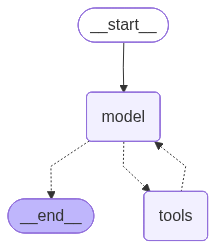

In [28]:
from langchain.agents import create_agent


agent = create_agent(
    model,
    tools,
)

agent


In [34]:
response = agent.invoke({
    "messages": [
        {
            "role": "user",
            "content": "multiply 2 and 7"
        }
    ]
})

print(response)


{'messages': [HumanMessage(content='multiply 2 and 7', additional_kwargs={}, response_metadata={}, id='3a6f167e-e118-48b6-9a05-8b01e36098eb'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'khk5tadmm', 'function': {'arguments': '{"a":2,"b":7}', 'name': 'multiply'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 322, 'total_tokens': 341, 'completion_time': 0.027880278, 'completion_tokens_details': None, 'prompt_time': 0.020419223, 'prompt_tokens_details': None, 'queue_time': 0.054872457, 'total_time': 0.048299501}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_f757f4b0bf', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b6d9f-08a5-7d22-9d81-f439c8102d70-0', tool_calls=[{'name': 'multiply', 'args': {'a': 2, 'b': 7}, 'id': 'khk5tadmm', 'type': 'tool_call'}], usage_metadata={'input_tokens': 322, 'output_tokens': 19, 'total_tokens': 

In [37]:
from langchain_core.messages import HumanMessage

response = agent.invoke({
    "messages": [HumanMessage(content="what is weather of Bengaluru today with date")]
})

print(response)


{'messages': [HumanMessage(content='what is weather of Bengaluru today with date', additional_kwargs={}, response_metadata={}, id='00c017a3-5d9a-4a27-aeed-0b982cfed964'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '7q8gxwxs5', 'function': {'arguments': '{"city":"Bengaluru"}', 'name': 'get_weather'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 46, 'prompt_tokens': 325, 'total_tokens': 371, 'completion_time': 0.068555757, 'completion_tokens_details': None, 'prompt_time': 0.021910795, 'prompt_tokens_details': None, 'queue_time': 0.056256925, 'total_time': 0.090466552}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_1151d4f23c', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b6da0-0d5b-7563-a67f-3e07f56d9598-0', tool_calls=[{'name': 'get_weather', 'args': {'city': 'Bengaluru'}, 'id': '7q8gxwxs5', 'type': 'tool_call'}], usage_metadata={'input_token

#### Invoking the Messages

In [42]:
result = agent.invoke({
    "messages":[
        {
            "role":"user",
            "content":"What is the weather of Bengaluru"
        }
    ]
})
result

{'messages': [HumanMessage(content='What is the weather of Bengaluru', additional_kwargs={}, response_metadata={}, id='2ee70a11-14a7-4d27-b7e0-836b61966d6d'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'he7gqf3kh', 'function': {'arguments': '{"city":"Bengaluru"}', 'name': 'get_weather'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 323, 'total_tokens': 340, 'completion_time': 0.030265401, 'completion_tokens_details': None, 'prompt_time': 0.035159726, 'prompt_tokens_details': None, 'queue_time': 0.050631404, 'total_time': 0.065425127}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_ff2b098aaf', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019b6da4-cffc-7713-a5a5-56dd713cd5fa-0', tool_calls=[{'name': 'get_weather', 'args': {'city': 'Bengaluru'}, 'id': 'he7gqf3kh', 'type': 'tool_call'}], usage_metadata={'input_tokens': 323, '

#### Create an agent

In [ ]:
from langchain_community.utilities import ArxivAPIWrapper,WikipediaAPIWrapper
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun
from langchain_community.tools.tavily_search import TavilySearchResults

def divide(a:int,b:int)->int:
    """Divide function"""
    return a/b

wiki_wrapper = WikipediaAPIWrapper(top_k_results=5,doc_content_chars_max=500)
wiki = WikipediaQueryRun(wikipedia_api_wrapper=wiki_wrapper)

arxiv_wrapper = ArxivAPIWrapper(top_k_results=5,doc_content_chars_max=500)
arxiv = ArxivQueryRun(arxiv_api_wrapper=arxiv_wrapper)

arxiv.run("What is the impact of global warming on the environment?")






tools = [divide]

In [ ]:
from langchain.agents import create_agent